<a href="https://colab.research.google.com/github/arifRusly/test/blob/master/Closing_Stock_Price_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description : this program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
# to predict the closing stock price of a corporation (Apple Inc.) using the past few month stock price.

In [2]:
%tensorflow_version 1.14

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [0]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
# Get the stock quote
df = web.DataReader('AAPL', data_source = 'yahoo', start = '2010-01-01', end = '2020-03-29')

# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.538483
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.584366
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.161509
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.113146
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.286753
...,...,...,...,...,...,...
2020-03-23,228.500000,212.610001,228.080002,224.369995,84188200.0,224.369995
2020-03-24,247.690002,234.300003,236.360001,246.880005,71882800.0,246.880005
2020-03-25,258.250000,244.300003,250.750000,245.520004,75900500.0,245.520004


In [6]:
# Get the number of rows and columns in the data set
df.shape

(2576, 6)

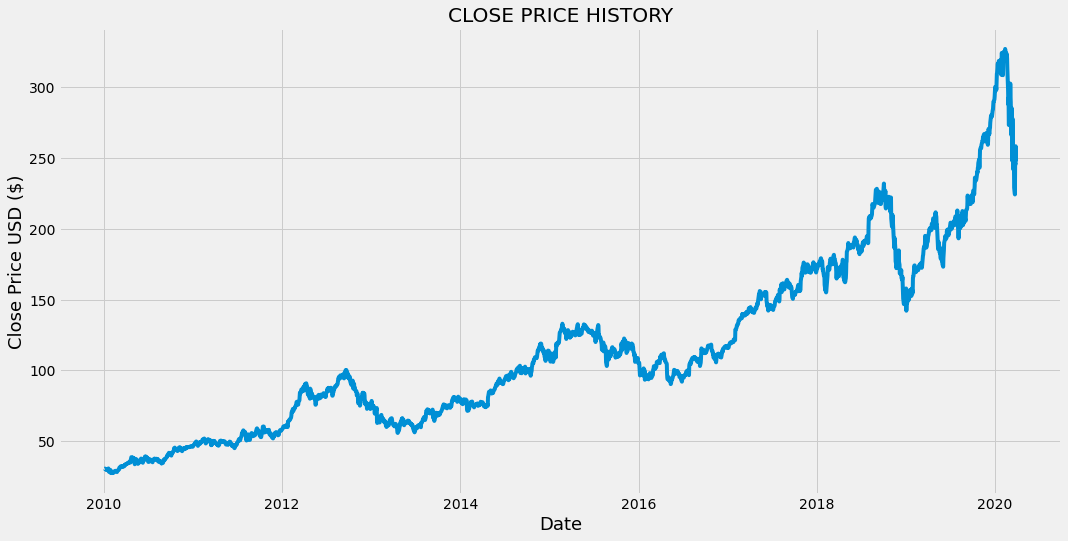

In [7]:
# Visualize the closing price history
plt.figure(figsize = (16,8))
plt.title('CLOSE PRICE HISTORY')
plt.plot(df['Close']) # get the closing price
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show() # show the graph

In [8]:
# Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])

# Conver the data frame to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2061

In [9]:
# Scaler the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01046536],
       [0.01064169],
       [0.0090166 ],
       ...,
       [0.72751923],
       [0.77061975],
       [0.73492505]])

In [10]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []   #independent x variable 
y_train = [] # independent y variable

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])# we gonna append the past 60 values to our X_train data (will contain 60 values from position 0 to 59)
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([1.04653630e-02, 1.06416897e-02, 9.01660433e-03, 8.83074613e-03,
       9.49793954e-03, 8.60676186e-03, 7.46777113e-03, 8.86410644e-03,
       8.28269668e-03, 6.61471952e-03, 1.09562233e-02, 9.37879559e-03,
       7.63456630e-03, 2.71641848e-03, 5.25174452e-03, 6.61948528e-03,
       7.54402326e-03, 3.45032614e-03, 4.76575809e-06, 1.27719135e-03,
       1.81570929e-03, 3.42173159e-03, 0.00000000e+00, 1.62508533e-03,
       9.86486473e-04, 1.97297931e-03, 1.46305592e-03, 3.15485550e-03,
       3.96978105e-03, 5.40900818e-03, 5.00393146e-03, 5.18502391e-03,
       4.58455111e-03, 3.98884408e-03, 2.38758754e-03, 4.10322227e-03,
       4.74182113e-03, 5.99041794e-03, 8.07300968e-03, 8.00628907e-03,
       8.23503910e-03, 8.89270099e-03, 1.28195966e-02, 1.28815451e-02,
       1.47592156e-02, 1.56265581e-02, 1.59410981e-02, 1.64653188e-02,
       1.51499950e-02, 1.54406999e-02, 1.52834362e-02, 1.55360151e-02,
       1.43922586e-02, 1.55836726e-02, 1.73040668e-02, 1.77854020e-02,
     

In [0]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
# Reshape the data
# LSTM SHOULD BE 3 DIMENSIONAL ARRAY so we gonna convert it intp 3 dimensional array
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2001, 60, 1)

In [13]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





2001/2001 [==============================] - 144s 72ms/step - loss: 5.0041e-04


In [0]:
# Create the Testing data set
# Create a nwe array containing scaled values from 2001 to 2500
test_data = scaled_data[training_data_len - 60: , :]

#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] # will be the values that we want to predict(actual test value)

#create x_tset set
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
# Convert data to a numpy array
x_test = np.array(x_test)

In [0]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [0]:
# Get the models predicted price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [22]:
# Get the Root Mean Squared Error(RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

10.094227674169447

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


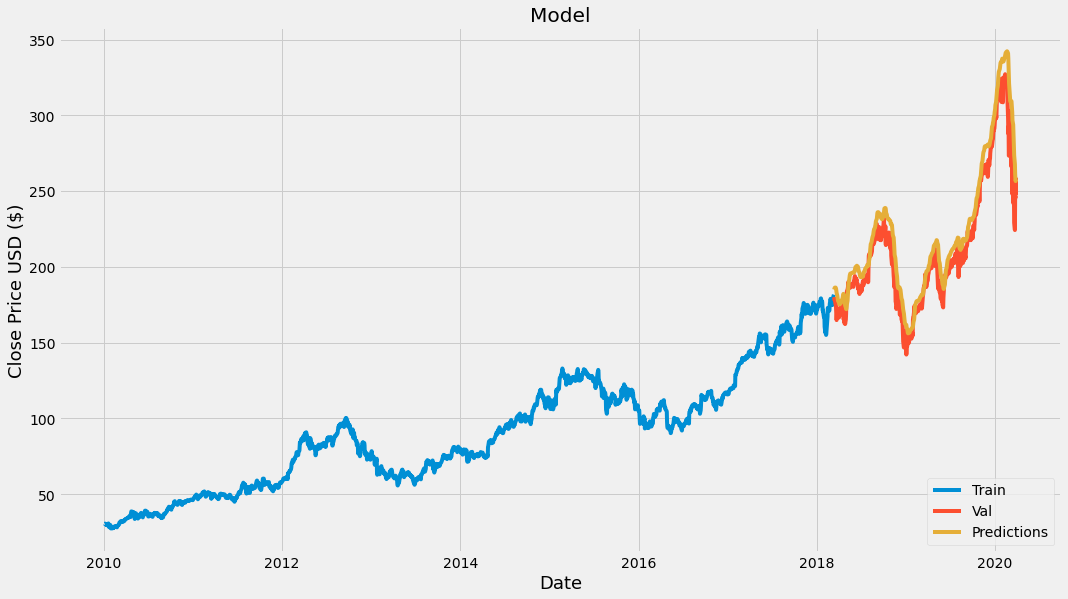

In [23]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len: ]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,9))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']]) 
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [24]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-03-13,179.970001,185.056747
2018-03-14,178.440002,185.739990
2018-03-15,178.649994,186.138870
2018-03-16,178.020004,186.369873
2018-03-19,175.300003,186.414368
...,...,...
2020-03-23,224.369995,267.853821
2020-03-24,246.880005,261.598602
2020-03-25,245.520004,258.309296


In [32]:
# Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='20-01-01', end='2020-03-30')

# Create new Data Frame
new_df = apple_quote.filter(['Close'])

# Get the last 60 day closing price values and convert the data frame to an array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
X_test = []

# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test dataset to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)

# Print the predicted price
print(pred_price)

[[260.23856]]


In [33]:
# Get the quote ( to show the different price of predicted and actual)
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-03-30', end='2020-03-30')
print(apple_quote2['Close']) #print only closing price

Date
2020-03-30    254.809998
Name: Close, dtype: float64
